In [0]:
import torch
import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision import datasets, transforms

In [0]:
batch_size    = 32
learning_rate = 0.001
epochs    = 25

In [0]:
def oneHot(a, oneHot_batch_size):
    out = []
    for i in a:
      b = torch.zeros(10)
      b[i] = 1.
      out.append(b)
    out = torch.cat(out)
    out = out.reshape(oneHot_batch_size, 10)
    return out

Files already downloaded and verified
(50000, 32, 32, 3)
(10000, 32, 32, 3)
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
tensor(2) tensor(4) tensor(0) tensor(4) tensor(2) tensor(1) tensor(4) tensor(9) tensor(1) tensor(1) 

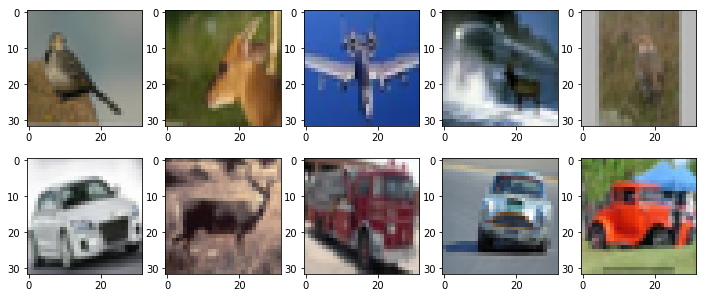

In [0]:
# datasets.datasets.CIFAR10.
train_loader = torch.utils.data.DataLoader(datasets.CIFAR10('data', 
                                                          train=True, 
                                                          download=True, 
                                                          transform=transforms.ToTensor()),
                                           batch_size=batch_size, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.CIFAR10('data', 
                                                         train=False, 
                                                         transform=transforms.ToTensor()),
                                          batch_size=batch_size,
                                          shuffle=True)
print(train_loader.dataset.data.shape)
print(test_loader.dataset.data.shape)
for data, target in train_loader:
    break
print(data.shape)
print(data[0].shape)
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(data[i].permute(1, 2, 0))
    print(target[i], end=' ')


In [0]:
x = data.reshape(batch_size,3*32*32)
y = oneHot(target,batch_size)

w = torch.randn(3*32*32, 128, requires_grad=True) 
b = torch.randn(128, requires_grad=True)

w2 = torch.randn(128, 32, requires_grad=True) 
b2 = torch.randn(32, requires_grad=True)

w3 = torch.randn(32, 10, requires_grad=True) 
b3 = torch.randn(10, requires_grad=True)

a = torch.mm(x, w/10) + b/10
x2 = 1 / (1 + torch.exp(- (a)))

a2 = torch.mm(x2, w2/10) + b2/10
x3 = 1 / (1 + torch.exp(- (a2)))

a3 = torch.mm(x3, w3/10) + b3/10
y_ = 1 / (1 + torch.exp(- (a3)))


BCE = torch.nn.BCELoss()
loss = BCE(y_, y)

optimizer = torch.optim.Adam([w, b, w2, b2, w3, b3], lr=learning_rate)
# optimizer = torch.optim.Adam([w, b, w2, b2], lr=learning_rate)
# optimizer = torch.optim.Adam([w, b], lr=learning_rate)

In [0]:
start = datetime.datetime.now()
all_row = float(train_loader.dataset.data.shape[0])
loss_train = []
accuracy_train = []
print('Start Epochs processing... ')
for epoch in range(epochs):
    tot_loss = 0
    cnt = 0
    for data, target in train_loader:
        batch_size_in = data.shape[0]
        x = data.reshape(batch_size_in,3*32*32)
        y = oneHot(target,batch_size_in)
        
        a = torch.mm(x, w/10) + b/10
        x2 = 1 / (1 + torch.exp(- (a)))

        a2 = torch.mm(x2, w2/10) + b2/10
        x3 = 1 / (1 + torch.exp(- (a2)))

        a3 = torch.mm(x3, w3/10) + b3/10
        y_ = 1 / (1 + torch.exp(- (a3)))

        loss = BCE(y_, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tot_loss+=loss
        for i in range(batch_size_in):
            if y_[i].argmax() == target[i]:
                cnt+=1                      

    loss_train.append(float(tot_loss/all_row))
    accuracy_train.append(float(cnt/all_row))

    end = datetime.datetime.now()
    time_train = end-start
    print('Epochs processing... ',epoch,' ',time_train,float(cnt/all_row))
    
print(loss_train[-1]) 
print(accuracy_train[-1])


Start Epochs processing... 
Epochs processing...  0   0:00:18.846575 0.1
Epochs processing...  1   0:00:37.257478 0.15076
Epochs processing...  2   0:00:56.325516 0.20706
Epochs processing...  3   0:01:15.376194 0.24492
Epochs processing...  4   0:01:34.226270 0.3031
Epochs processing...  5   0:01:53.113200 0.33096
Epochs processing...  6   0:02:11.931438 0.34598
Epochs processing...  7   0:02:30.511428 0.36128
Epochs processing...  8   0:02:49.381286 0.37066
Epochs processing...  9   0:03:08.055570 0.38164
Epochs processing...  10   0:03:26.840407 0.3888
Epochs processing...  11   0:03:45.661485 0.39734
Epochs processing...  12   0:04:04.508118 0.4021
Epochs processing...  13   0:04:23.308465 0.40956
Epochs processing...  14   0:04:41.845115 0.41534
Epochs processing...  15   0:05:00.449219 0.42148
Epochs processing...  16   0:05:19.155678 0.427
Epochs processing...  17   0:05:37.606653 0.43184
Epochs processing...  18   0:05:56.049045 0.43784
Epochs processing...  19   0:06:15.133628

In [0]:
cnt = 0
all_row_test = float(test_loader.dataset.data.shape[0])
for data, target in test_loader:
    batch_size_in = data.shape[0]
    x = data.reshape(batch_size_in,3*32*32)
    y = oneHot(target,batch_size_in)

    a = torch.mm(x, w/10) + b/10
    x2 = 1 / (1 + torch.exp(- (a)))

    a2 = torch.mm(x2, w2/10) + b2/10
    x3 = 1 / (1 + torch.exp(- (a2)))

    a3 = torch.mm(x3, w3/10) + b3/10
    y_ = 1 / (1 + torch.exp(- (a3)))
    
    for i in range(batch_size_in):
        if y_[i].argmax() == target[i]:
            cnt+=1
accuracy_test = cnt/all_row_test
print(accuracy_test)

0.4512


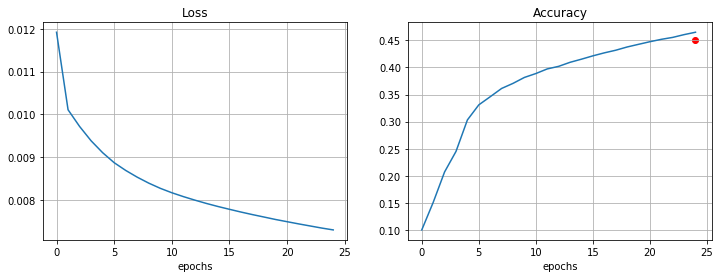

In [0]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('epochs')
plt.plot(range(epochs),loss_train)
plt.grid()
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('epochs')
plt.plot(range(epochs),accuracy_train)
plt.scatter(epochs-1,accuracy_test,c='r')
plt.grid()
plt.show()

In [0]:
# CIFAR10

# epochs = 10
# дле batch_size = 32

# Результаты DNN 3072 128 32 10 (отработано на Colab (TPU))
#       0:04:56                           Jupiter 0:07:43 
#       loss_train = 0.00819335225969553  Jupiter 0.00822394248098135
#       accuracy_train = 0.38516          Jupiter 0.37936
#       accuracy_test  = 0.3908           Jupiter 0.3851
    
# Результаты DNN 3072 32 10 (отработано на Colab (TPU))
#       0:02:39
#       loss_train = 0.008472164161503315
#       accuracy_train = 0.37046
#       accuracy_test  = 0.3711

# Результаты DNN 3072 10 (отработано на Colab (TPU))
#       0:01:36
#       loss_train = 0.00881444662809372
#       accuracy_train = 0.3753
#       accuracy_test  = 0.362


# epochs = 25
# дле batch_size = 32

# Результаты DNN 3072 128 32 10 (отработано на Colab (TPU))
#       0:08:43                           Jupiter 0:20:00
#       loss_train = 0.00724001182243228  Jupiter 0.007220798172056675
#       accuracy_train = 0.46934          Jupiter 0.47196
#       accuracy_test  = 0.4597           Jupiter 0.4607

# Результаты DNN 3072 32 10 (отработано на Colab (TPU))
#       0:06:16
#       loss_train = 0.00789052527397871
#       accuracy_train = 0.42408
#       accuracy_test  = 0.4193

# Результаты DNN 3072 10 (отработано на Colab (TPU))
#       0:04:07
#       loss_train = 0.00848523247987032
#       accuracy_train = 0.40472
#       accuracy_test  = 0.3898

#############       Дополнительные наблюдения PyTorch OOP    ###################

# epochs = 25
# дле batch_size = 32

# Увеличение числа нейронов на 1 слое добавляет точности
# Результаты DNN 3072 512 32 10 (отработано на Colab (TPU))
#       0:26:37
#       loss_train = 0.006550549995154142
#       accuracy_train = 0.53738
#       accuracy_test  = 0.5033

# epochs = 720              
# дле batch_size = 32

# С увеличением эпох точность на train растет, а вот на test в какой-то момент останавливается
# так понимаю это переобучение. нужно ли валидация?
# Результаты DNN 3072 128 32 10 (отработано на Colab (TPU))
#       4:00:00
#       loss_train = 0.0014675470301881433
#       accuracy_train = 0.93506
#       accuracy_test  = 0.4708
